In [1]:
#import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
import datetime as dt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN

In [2]:
# Load the dataset
data = pd.read_csv("sales_data_sample.csv", encoding='unicode_escape')

In [3]:
# Display the first few rows of the dataset
data.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [4]:
# Get information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [5]:
# Display unique product lines
data['PRODUCTLINE'].unique()

array(['Motorcycles', 'Classic Cars', 'Trucks and Buses', 'Vintage Cars',
       'Planes', 'Ships', 'Trains'], dtype=object)

In [6]:
# Check for missing values
data.isnull().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In [7]:
# Describe the dataset
data.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.00000,2823.000000
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,2.717676,7.092455,2003.81509,100.715551
std,92.085478,9.741443,20.174277,4.225841,1841.865106,1.203878,3.656633,0.69967,40.187912
min,10100.000000,6.000000,26.880000,1.000000,482.130000,1.000000,1.000000,2003.00000,33.000000
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,2.000000,4.000000,2003.00000,68.000000
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,3.000000,8.000000,2004.00000,99.000000
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,4.000000,11.000000,2004.00000,124.000000
max,10425.000000,97.000000,100.000000,18.000000,14082.800000,4.000000,12.000000,2005.00000,214.000000


In [8]:
# Display column names
data.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE',
       'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE'],
      dtype='object')

In [9]:
# Number of unique customer names in each product line
data['PRODUCTLINE'].nunique('CUSTOMERNAME')

7

In [10]:
# Drop unnecessary columns
to_drop = ['PHONE', 'ADDRESSLINE1', 'ADDRESSLINE2', 'STATE', 'POSTALCODE', 'TERRITORY']
df = data.drop(to_drop, axis=1)
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,CITY,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,Motorcycles,95,S10_1678,Land of Toys Inc.,NYC,USA,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,Motorcycles,95,S10_1678,Reims Collectables,Reims,France,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,Motorcycles,95,S10_1678,Lyon Souveniers,Paris,France,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,Motorcycles,95,S10_1678,Toys4GrownUps.com,Pasadena,USA,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,Motorcycles,95,S10_1678,Corporate Gift Ideas Co.,San Francisco,USA,Brown,Julie,Medium


In [11]:
# Check for missing values after dropping columns
df.isnull().sum()

ORDERNUMBER         0
QUANTITYORDERED     0
PRICEEACH           0
ORDERLINENUMBER     0
SALES               0
ORDERDATE           0
STATUS              0
QTR_ID              0
MONTH_ID            0
YEAR_ID             0
PRODUCTLINE         0
MSRP                0
PRODUCTCODE         0
CUSTOMERNAME        0
CITY                0
COUNTRY             0
CONTACTLASTNAME     0
CONTACTFIRSTNAME    0
DEALSIZE            0
dtype: int64

In [12]:
# Convert ORDERDATE to datetime
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])
df['ORDERDATE']

0      2003-02-24
1      2003-05-07
2      2003-07-01
3      2003-08-25
4      2003-10-10
          ...    
2818   2004-12-02
2819   2005-01-31
2820   2005-03-01
2821   2005-03-28
2822   2005-05-06
Name: ORDERDATE, Length: 2823, dtype: datetime64[ns]

In [13]:
# Describe quantitative variables
quant_vars = ['QUANTITYORDERED', 'PRICEEACH', 'SALES', 'MSRP']
df[quant_vars].describe()

,QUANTITYORDERED,PRICEEACH,SALES,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000
mean,35.092809,83.658544,3553.889072,100.715551
std,9.741443,20.174277,1841.865106,40.187912
min,6.000000,26.880000,482.130000,33.000000
25%,27.000000,68.860000,2203.430000,68.000000
50%,35.000000,95.700000,3184.800000,99.000000
75%,43.000000,100.000000,4508.000000,124.000000
max,97.000000,100.000000,14082.800000,214.000000


In [14]:
# Value counts of STATUS
df['STATUS'].value_counts()

STATUS
Shipped       2617
Cancelled       60
Resolved        47
On Hold         44
In Process      41
Disputed        14
Name: count, dtype: int64

In [15]:
# Number of unique months in each year
df.groupby(['YEAR_ID'])['MONTH_ID'].nunique()

YEAR_ID
2003    12
2004    12
2005     5
Name: MONTH_ID, dtype: int64

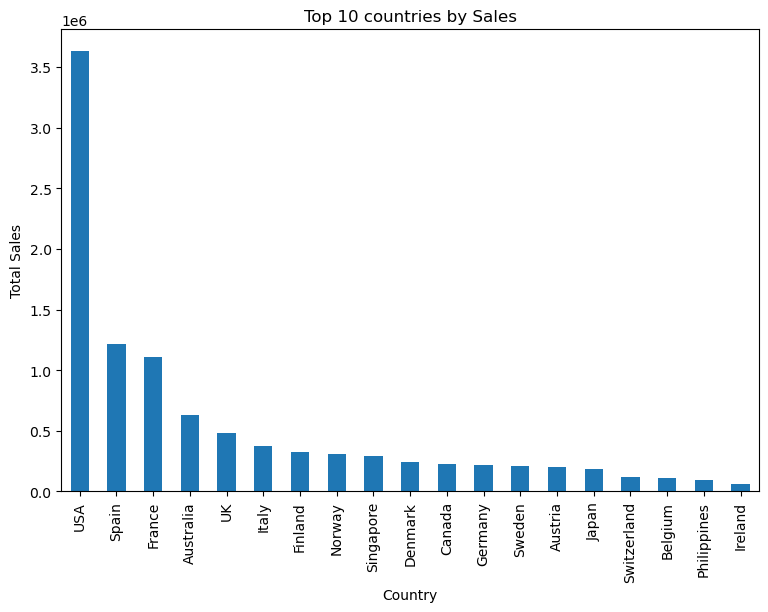

In [16]:
# Plot sales by country
plt.figure(figsize=(9, 6))
top_cities = df.groupby(['COUNTRY'])['SALES'].sum().sort_values(ascending=False)
top_cities.plot(kind='bar')
plt.title('Top 10 countries by Sales')
plt.xlabel('Country')
plt.ylabel('Total Sales')
plt.show()

In [17]:
# Create YEAR_MONTH feature
df['YEAR_MONTH'] = df['YEAR_ID'].map(str) + df['MONTH_ID'].map(str).map(lambda x: x.rjust(2, '0'))
df['YEAR_MONTH'].head()

0    200302
1    200305
2    200307
3    200308
4    200310
Name: YEAR_MONTH, dtype: object

<Figure size 1000x800 with 0 Axes>

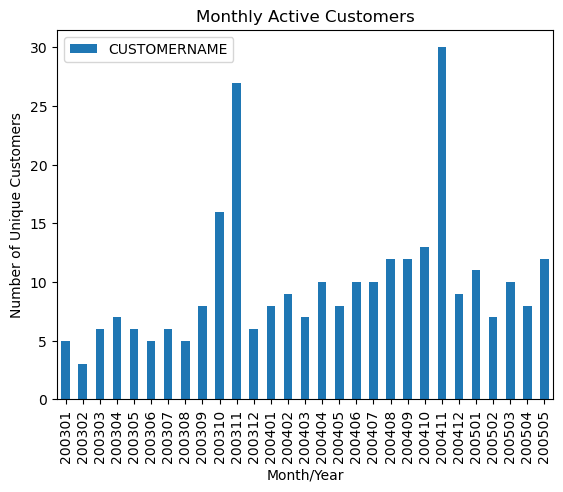

In [18]:
# Plot monthly active customers
plt.figure(figsize=(10, 8))
monthly_active = df.groupby(['YEAR_MONTH'])['CUSTOMERNAME'].nunique().reset_index()
monthly_active.plot(kind='bar', x='YEAR_MONTH', y='CUSTOMERNAME')
plt.title('Monthly Active Customers')
plt.xlabel('Month/Year')
plt.ylabel('Number of Unique Customers')
plt.xticks(rotation=90)
plt.show()

In [19]:
# Calculate the first purchase date for each customer
df['YEAR_MONTH'] = df['YEAR_ID'].map(str) + df['MONTH_ID'].map(str).map(lambda x: x.rjust(2, '0'))
df_first_purchase = df.groupby('CUSTOMERNAME').YEAR_MONTH.min().reset_index()
df_first_purchase.columns = ['CUSTOMERNAME', 'FirstPurchaseDate']

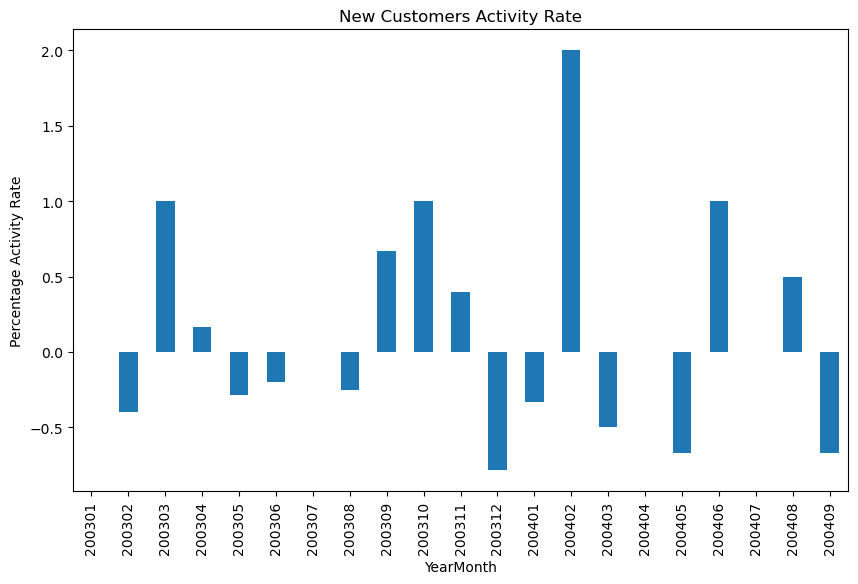

In [20]:
# Plot new customers activity rate
plt.figure(figsize=(10, 6))
df_first_purchase.groupby(['FirstPurchaseDate'])['CUSTOMERNAME'].nunique().pct_change().plot(kind='bar')
plt.title('New Customers Activity Rate')
plt.xlabel('YearMonth')
plt.ylabel('Percentage Activity Rate')
plt.show()

In [21]:
# Calculate Recency, Frequency, and Monetary value for each customer
import warnings
warnings.filterwarnings('ignore')

df['ORDERDATE'] = [d.date() for d in df['ORDERDATE']]
snapshot_date = df['ORDERDATE'].max() + dt.timedelta(days=1)

df_RFM = df.groupby(['CUSTOMERNAME']).agg({
    'ORDERDATE': lambda x: (snapshot_date - x.max()).days,
    'ORDERNUMBER': 'count',
    'SALES': 'sum'
}).rename(columns={'ORDERDATE': 'Recency', 'ORDERNUMBER': 'Frequency', 'SALES': 'MonetaryValue'})

df_RFM['MonetaryValue'] = df_RFM['MonetaryValue'] / df_RFM['Frequency']
df_RFM.head()

,Recency,Frequency,MonetaryValue
CUSTOMERNAME,,,
"AV Stores, Co.",196,51,3094.270784
Alpha Cognac,65,20,3524.422000
Amica Models & Co.,265,26,3619.894615
"Anna's Decorations, Ltd",84,46,3347.741957
Atelier graphique,188,7,3454.280000


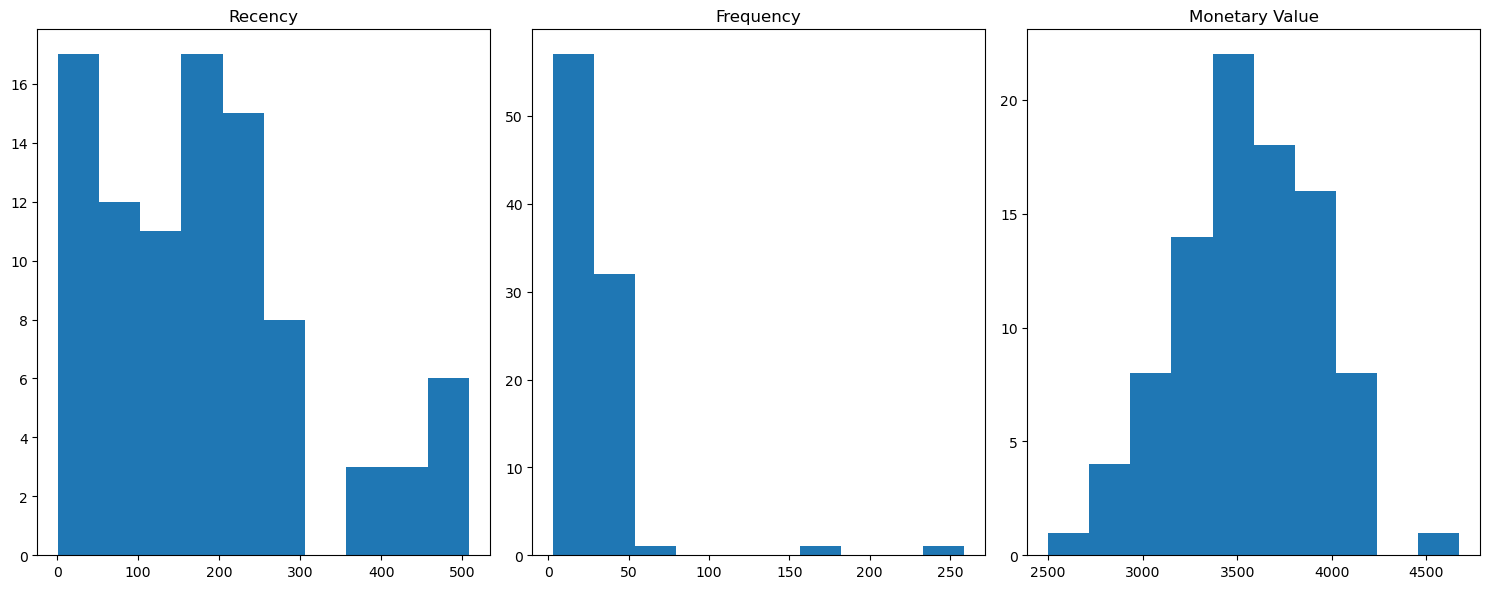

In [22]:
# Plot histograms for Recency, Frequency, and Monetary Value
plt.figure(figsize=(15, 6))
plt.subplot(1, 3, 1)
plt.hist(df_RFM['Recency'])
plt.title('Recency')
plt.subplot(1, 3, 2)
plt.hist(df_RFM['Frequency'])
plt.title('Frequency')
plt.subplot(1, 3, 3)
plt.hist(df_RFM['MonetaryValue'])
plt.title('Monetary Value')
plt.tight_layout()
plt.show()

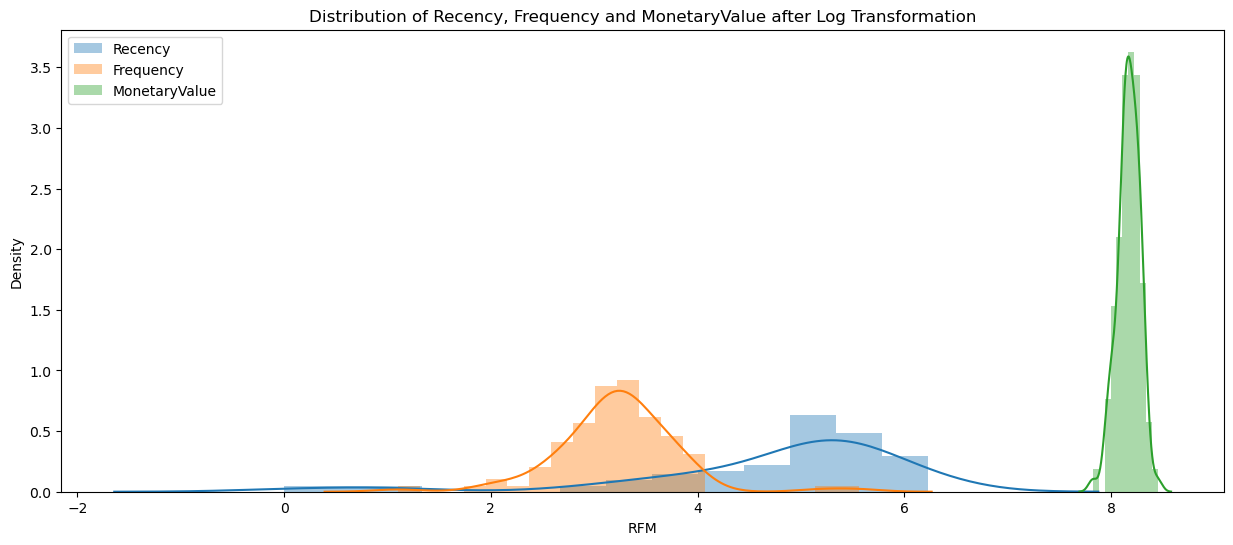

In [23]:
# Log transformation of RFM variables
data_log = np.log(df_RFM)
plt.figure(figsize=(15, 6))
sns.distplot(data_log['Recency'], label='Recency')
sns.distplot(data_log['Frequency'], label='Frequency')
sns.distplot(data_log['MonetaryValue'], label='MonetaryValue')
plt.title('Distribution of Recency, Frequency and MonetaryValue after Log Transformation')
plt.xlabel("RFM")
plt.legend()
plt.show()

In [24]:
# Standardize the log-transformed data
scaler = StandardScaler()
data_normalized = scaler.fit_transform(data_log)
data_normalized = pd.DataFrame(data_normalized, index=data_log.index, columns=data_log.columns)

In [25]:
# Plot SSE for different values of k using Elbow Method
sse = {}
for k in range(1, 21):
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(data_normalized)
    sse[k] = kmeans.inertia_

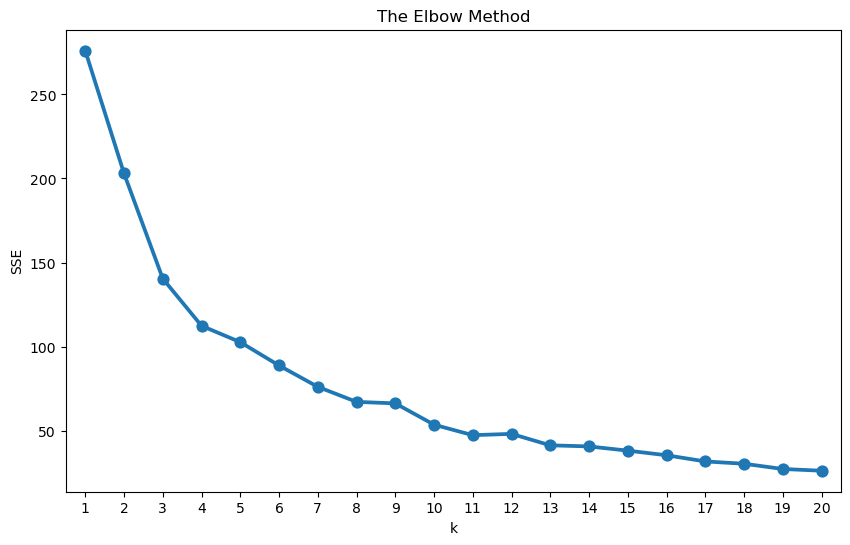

In [26]:
plt.figure(figsize=(10, 6))
plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

In [27]:
# Silhouette analysis to determine optimal number of clusters
from sklearn.metrics import silhouette_score
range_n_clusters = range(2, 10)
silhouette_avg = []
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(data_normalized)
    cluster_labels = kmeans.labels_
    silhouette_avg.append(silhouette_score(data_normalized, cluster_labels))

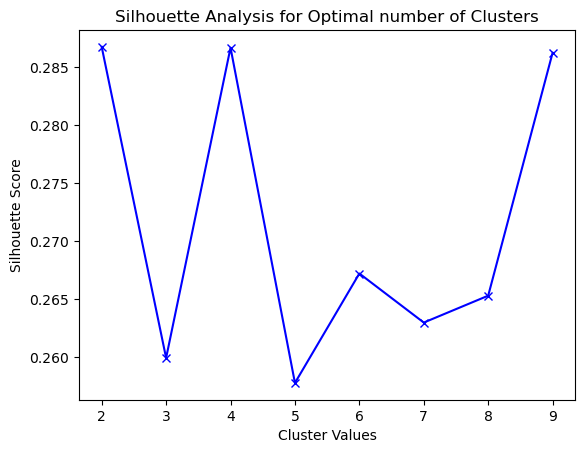

In [28]:
plt.plot(range_n_clusters, silhouette_avg, 'bx-')
plt.xlabel("Cluster Values")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Analysis for Optimal number of Clusters")
plt.show()

In [29]:
# Fit KMeans with optimal number of clusters
kmeans = KMeans(n_clusters=3, random_state=101, init='k-means++')
kmeans_fit = kmeans.fit(data_normalized)
pred = kmeans.predict(data_normalized)
frame = pd.DataFrame(data_normalized)
frame['Cluster'] = pred
frame['Cluster'].value_counts()

Cluster
1    47
0    37
2     8
Name: count, dtype: int64

In [30]:
# Assign cluster labels to original data
clustered_data = df_RFM.assign(Cluster=kmeans.labels_)
kmeans_group = clustered_data.groupby(['Cluster']).mean().round(1)
kmeans_group

,Recency,Frequency,MonetaryValue
Cluster,,,
0,214.2,24.0,3219.5
1,188.2,26.8,3817.2
2,6.1,84.1,3524.3


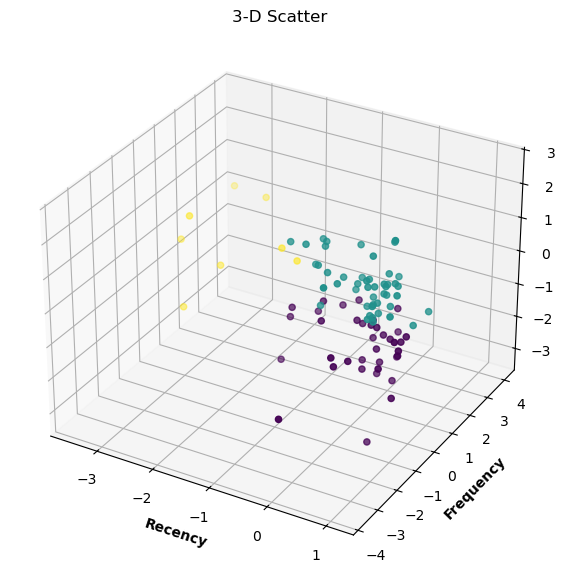

In [31]:
# 3D Scatter plot of the clusters
from mpl_toolkits import mplot3d
plt.figure(figsize=(10, 7))
ax = plt.axes(projection="3d")
ax.scatter3D(data_normalized['Recency'], data_normalized['Frequency'], data_normalized['MonetaryValue'], c=kmeans.labels_)
ax.set_xlabel('Recency', fontweight='bold')
ax.set_ylabel('Frequency', fontweight='bold')
ax.set_zlabel('MonetaryValue', fontweight='bold')
plt.title('3-D Scatter')
plt.show()

In [32]:
from sklearn.decomposition import PCA

# Apply PCA to reduce the dimensionality
pca = PCA(2)
dp = pca.fit_transform(data_normalized)
dp.shape
dp

from sklearn.metrics import silhouette_samples, silhouette_score

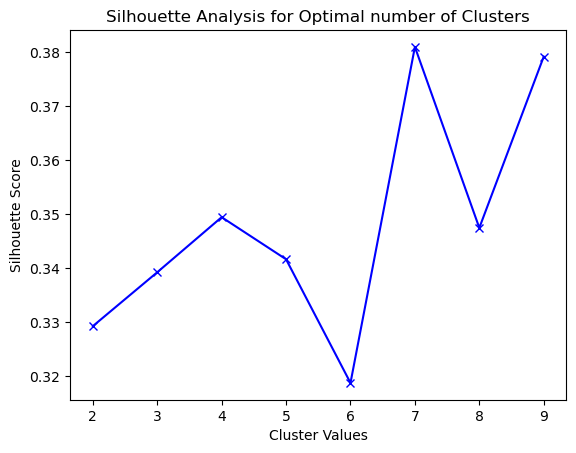

In [33]:
# Silhouette analysis to determine optimal number of clusters
range_n_clusters = range(2, 10)
silhouette_avg = []
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(dp)
    cluster_labels = kmeans.labels_
    silhouette_avg.append(silhouette_score(dp, cluster_labels))

plt.plot(range_n_clusters, silhouette_avg, 'bx-')
plt.xlabel("Cluster Values")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Analysis for Optimal number of Clusters")
plt.show()

In [34]:
# Applying KMeans clustering with optimal number of clusters
clusterer = KMeans(n_clusters=6, random_state=101)
cluster_labels = clusterer.fit_predict(dp)
silhouette_avg = silhouette_score(dp, cluster_labels)
print(f'Silhouette Score for n=6 is : {silhouette_avg}')

Silhouette Score for n=6 is : 0.3490863397774181


In [35]:
# Fit k-means clustering on the PCA transformed data
kmeans = KMeans(n_clusters=6, random_state=101)
kmeans.fit(dp)
cluster_labels = kmeans.labels_

In [36]:
# Create a DataFrame by adding a new cluster label column
data_rfm = df_RFM.assign(Cluster=cluster_labels)
data_rfm.head()

,Recency,Frequency,MonetaryValue,Cluster
CUSTOMERNAME,,,,
"AV Stores, Co.",196,51,3094.270784,4
Alpha Cognac,65,20,3524.422000,4
Amica Models & Co.,265,26,3619.894615,5
"Anna's Decorations, Ltd",84,46,3347.741957,4
Atelier graphique,188,7,3454.280000,1


In [37]:
# Getting unique labels
u_labels = np.unique(cluster_labels)

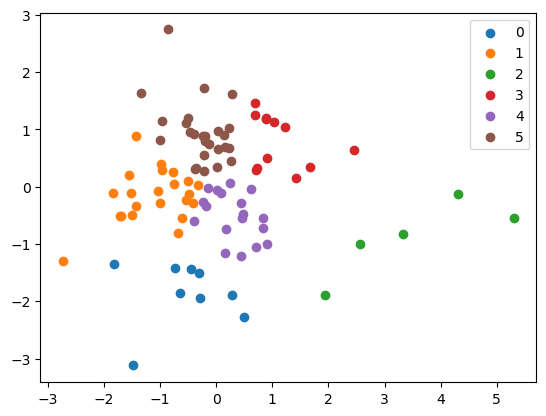

In [38]:
# Plotting the results
for i in u_labels:
    plt.scatter(dp[cluster_labels == i, 0], dp[cluster_labels == i, 1], label=i)
plt.legend()
plt.show()

In [39]:
# Create a spend quartile with 4 groups - a range between 1 and 4
MonetaryValue_quartile = pd.qcut(df_RFM['MonetaryValue'], q=4, labels=range(1, 5))
Recency_quartile = pd.qcut(df_RFM['Recency'], q=4, labels=list(range(4, 0, -1)))
Frequency_quartile = pd.qcut(df_RFM['Frequency'], q=4, labels=range(1, 5))

In [40]:
# Assign the quartile values to the Spend_Quartile column in data
df_RFM['R'] = Recency_quartile
df_RFM['F'] = Frequency_quartile
df_RFM['M'] = MonetaryValue_quartile

In [41]:
# Calculate RFM_Score
df_RFM['RFM_Score'] = df_RFM[['R', 'F', 'M']].sum(axis=1)
df_RFM.head()

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Score
CUSTOMERNAME,,,,,,,
"AV Stores, Co.",196,51,3094.270784,2,4,1,7
Alpha Cognac,65,20,3524.422000,4,2,2,8
Amica Models & Co.,265,26,3619.894615,1,2,3,6
"Anna's Decorations, Ltd",84,46,3347.741957,3,4,2,9
Atelier graphique,188,7,3454.280000,2,1,2,5


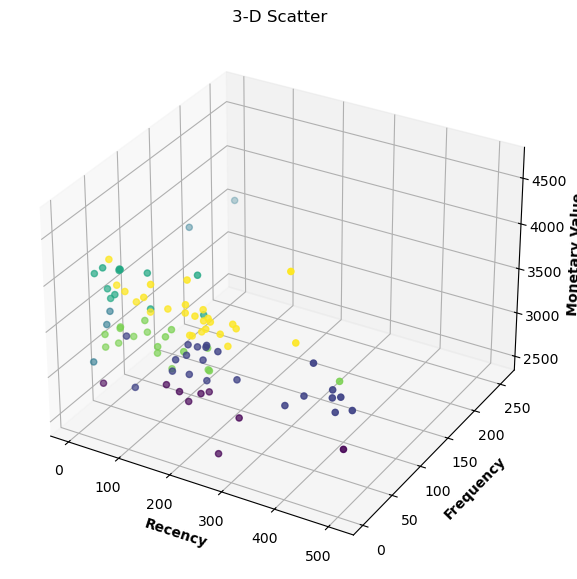

In [42]:
# Create 3D scatter plot
from mpl_toolkits import mplot3d
plt.figure(figsize=(10, 7))
ax = plt.axes(projection="3d")
ax.scatter3D(df_RFM['Recency'], df_RFM['Frequency'], df_RFM['MonetaryValue'], c=cluster_labels)
ax.set_xlabel('Recency', fontweight='bold')
ax.set_ylabel('Frequency', fontweight='bold')
ax.set_zlabel('Monetary Value', fontweight='bold')
plt.title('3-D Scatter')
plt.show()

In [43]:
# Define rfm_level function
def rfm_level(df):
    if (df['RFM_Score'] >= 10):
        return 'High Value Customer'
    elif ((df['RFM_Score'] < 10) & (df['RFM_Score'] >= 6)):
        return 'Mid Value Customer'
    else:
        return 'Low Value Customer'

In [44]:
# Create a new variable RFM_Level
df_RFM['RFM_Level'] = df_RFM.apply(rfm_level, axis=1)

In [45]:
# Print the header with top 5 rows to the console
df_RFM.head()

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Score,RFM_Level
CUSTOMERNAME,,,,,,,,
"AV Stores, Co.",196,51,3094.270784,2,4,1,7,Mid Value Customer
Alpha Cognac,65,20,3524.422000,4,2,2,8,Mid Value Customer
Amica Models & Co.,265,26,3619.894615,1,2,3,6,Mid Value Customer
"Anna's Decorations, Ltd",84,46,3347.741957,3,4,2,9,Mid Value Customer
Atelier graphique,188,7,3454.280000,2,1,2,5,Low Value Customer


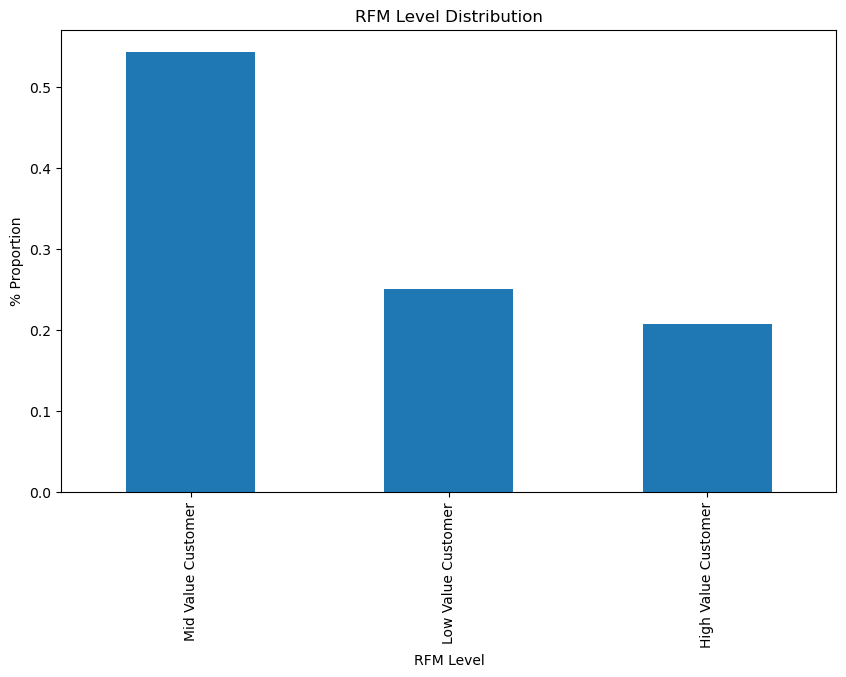

In [46]:
# Plot RFM Level distribution
plt.figure(figsize=(10, 6))
df_RFM['RFM_Level'].value_counts(normalize=True).plot(kind='bar')
plt.title('RFM Level Distribution')
plt.xlabel('RFM Level')
plt.ylabel('% Proportion')
plt.show()

In [47]:
# Group the data by cluster and calculate average RFM values and segment sizes per cluster value
grouped = data_rfm.groupby(['Cluster']).agg({
    'Recency': 'median',
    'Frequency': 'median',
    'MonetaryValue': ['median', 'count']
}).round(1)

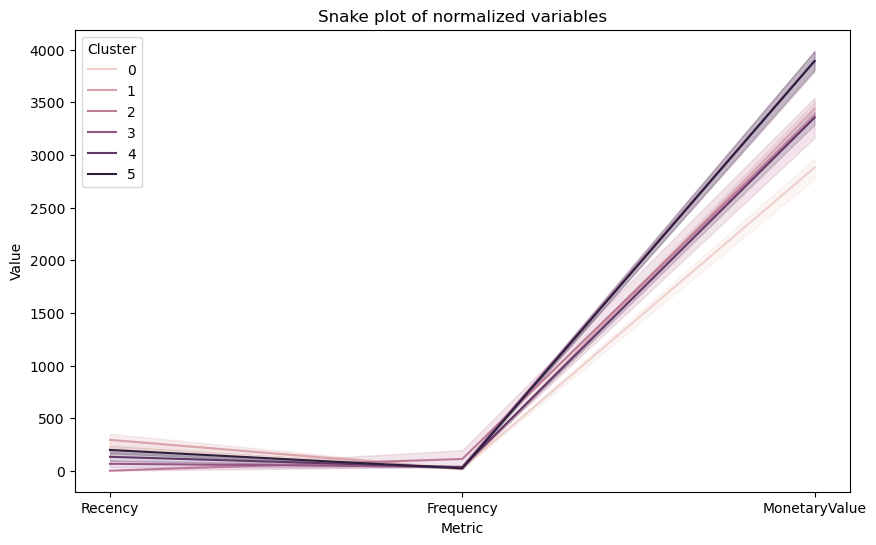

In [48]:
# Create a snake plot of normalized variables
data_rfm_melt = pd.melt(data_rfm.reset_index(), id_vars=['CUSTOMERNAME', 'Cluster'], value_vars=['Recency', 'Frequency', 'MonetaryValue'], var_name='Metric', value_name='Value')

plt.figure(figsize=(10, 6))
plt.title('Snake plot of normalized variables')
plt.xlabel('Metric')
plt.ylabel('Value')
sns.lineplot(data=data_rfm_melt, x='Metric', y='Value', hue='Cluster')
plt.show()

In [49]:
# Calculate average RFM values for each cluster and total customer population
drfm = data_rfm.drop(['Cluster'], axis=1)
cluster_avg = data_rfm.groupby(['Cluster']).median()
population_avg = drfm.median()

In [50]:
# Calculate relative importance of cluster's attribute value compared to population
relative_imp = cluster_avg / population_avg - 1
print(relative_imp.round(2))

         Recency  Frequency  MonetaryValue
Cluster                                   
0           0.08      -0.04          -0.19
1           0.27      -0.40          -0.03
2          -0.99       1.04          -0.04
3          -0.77       0.52           0.12
4          -0.32       0.27          -0.05
5           0.09      -0.06           0.09


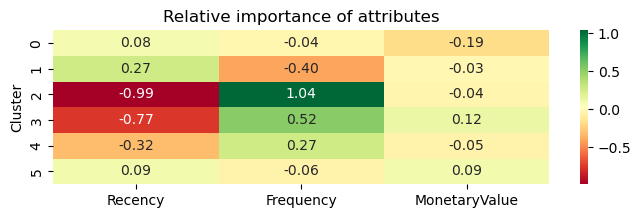

In [51]:
# Plot relative importance of attributes
plt.figure(figsize=(8, 2))
plt.title('Relative importance of attributes')
sns.heatmap(data=relative_imp, annot=True, fmt='.2f', cmap='RdYlGn')
plt.show()

In [52]:
# Add number of different kinds of vehicles purchased
data_normalized['Number of Different kinds of Vehicles purchased'] = df.groupby('CUSTOMERNAME').agg({'PRODUCTLINE': lambda x: x.nunique()})
df_explode = df.explode('PRODUCTLINE')
final_df = df_explode.groupby(['CUSTOMERNAME', 'PRODUCTLINE']).size().unstack(fill_value=0)
final_data = pd.merge(left=data_normalized, right=final_df, how='left', on='CUSTOMERNAME')

In [53]:
# Normalize numeric columns
numeric_cols = data_normalized.select_dtypes(include=['float64', 'int64'])
data_normalized[numeric_cols.columns] = numeric_cols.astype(float)
print(data_normalized.isnull().sum())
print(data_normalized.shape)

Recency                                            0
Frequency                                          0
MonetaryValue                                      0
Number of Different kinds of Vehicles purchased    0
dtype: int64
(92, 4)


In [54]:
# Normalize the data
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_normalized)

In [55]:
# Apply DBSCAN clustering
db = DBSCAN(eps=0.9, min_samples=4).fit(scaled_data)
labels = db.labels_
print(labels)

[-1  0  0 -1 -1 -1  0 -1  0 -1 -1  0 -1  0 -1  0 -1  0  0  0 -1  0  0  0
  0  0 -1 -1 -1  0 -1 -1  0 -1  0 -1  0 -1 -1  0  0  0 -1  0 -1 -1  0 -1
  0  0 -1  0 -1  0 -1 -1  0  0 -1  0  0  0  0  0 -1  0 -1 -1  0 -1 -1  0
  0  0 -1 -1  0  0 -1  0  0 -1 -1 -1  0  0 -1 -1  0  0  0  0]


In [56]:
# Create a DataFrame by adding a new cluster label column
data_db = (pd.DataFrame(final_data)).assign(Cluster=labels)
data_db.head()

,Recency,Frequency,MonetaryValue,Number of Different kinds of Vehicles purchased,Classic Cars,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars,Cluster
CUSTOMERNAME,,,,,,,,,,,,
"AV Stores, Co.",0.410354,1.224468,-1.241697,4,19,0,0,7,3,0,22,-1
Alpha Cognac,-0.409509,-0.391907,-0.019087,4,4,0,6,7,0,0,3,0
Amica Models & Co.,0.634398,0.061124,0.231969,5,4,0,0,3,1,1,17,0
"Anna's Decorations, Ltd",-0.219030,1.046298,-0.502163,4,24,6,0,0,0,9,7,-1
Atelier graphique,0.379399,-2.204660,-0.207905,3,4,2,0,0,0,0,1,-1


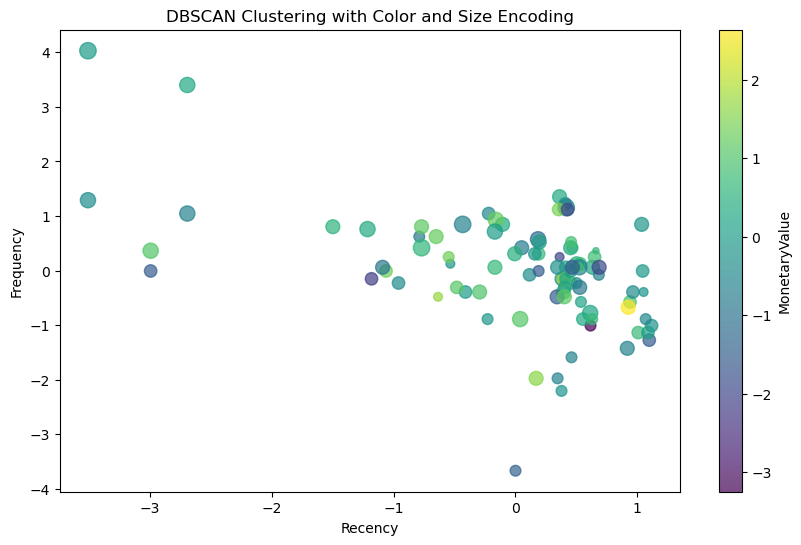

In [57]:
# Plot DBSCAN clustering results
x_feature = 'Recency'
y_feature = 'Frequency'
color_feature = 'MonetaryValue'
size_feature = 'Number of Different kinds of Vehicles purchased'

plt.figure(figsize=(10, 6))
plt.scatter(data_db[x_feature], data_db[y_feature],
            c=data_db[color_feature],  # Color represents Feature 3
            s=data_db[size_feature] * 20,  # Size represents Feature 4
            cmap='viridis', alpha=0.7)

plt.colorbar(label=color_feature)
plt.xlabel(x_feature)
plt.ylabel(y_feature)
plt.title("DBSCAN Clustering with Color and Size Encoding")
plt.show()

In [58]:
# Create 3D scatter plot with color and size encoding
x_feature = 'Recency'
y_feature = 'Frequency'
z_feature = 'MonetaryValue'
color_feature = 'Number of Different kinds of Vehicles purchased'

In [59]:
# Normalize the color feature for better visualization
data_db[color_feature] = (data_db[color_feature] - data_db[color_feature].min()) / (data_db[color_feature].max() - data_db[color_feature].min())

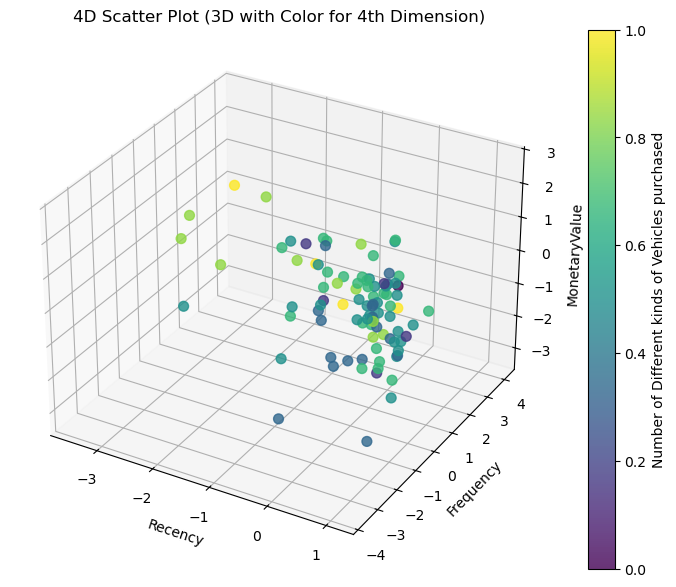

In [60]:
#Visualize the clusters
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(data_db[x_feature], data_db[y_feature], data_db[z_feature], c=data_db[color_feature], cmap='viridis', s=50, alpha=0.8)

cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label(color_feature)

ax.set_xlabel(x_feature)
ax.set_ylabel(y_feature)
ax.set_zlabel(z_feature)
plt.title("4D Scatter Plot (3D with Color for 4th Dimension)")
plt.show()